In [3]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from metasense.data import load_board
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
np.set_printoptions(suppress=True)

In [4]:
INVERSE_X = ['epa-co', 'epa-no2', 'epa-o3', 'temperature', 'pressure', 'humidity']
#INVERSE_Y = ['co-A', 'co-W', 'no2-A', 'no2-W', 'o3-A', 'o3-W', ]
INVERSE_Y = ['co', 'no2', 'o3']

In [5]:
(X_train, Y_train), (X_test, Y_test) = load_board(4)

In [6]:
train = X_train.join(Y_train)
test = X_test.join(Y_test)
train['co'] = train['co-W'] - train['co-A']
train['no2'] = train['no2-W'] - train['no2-A']
train['o3'] = train['o3-W'] - train['o3-A']

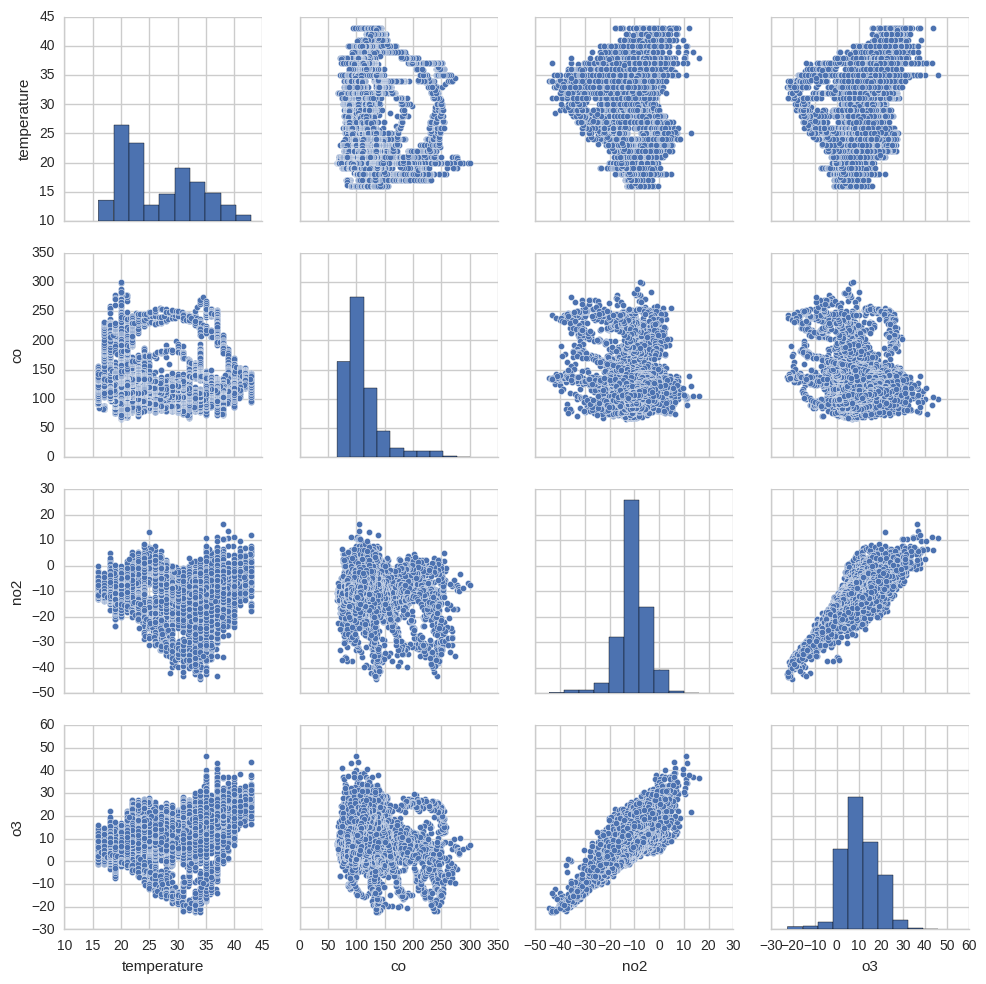

In [7]:
sns.pairplot(data=train, vars=['temperature', 'co', 'no2', 'o3'])
plt.show()

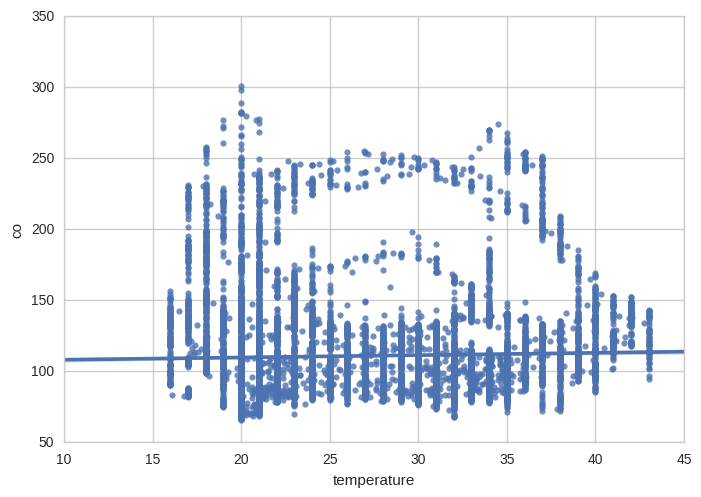

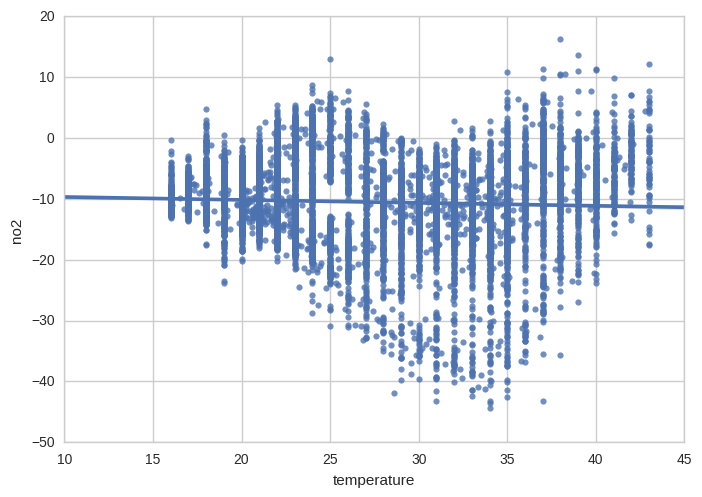

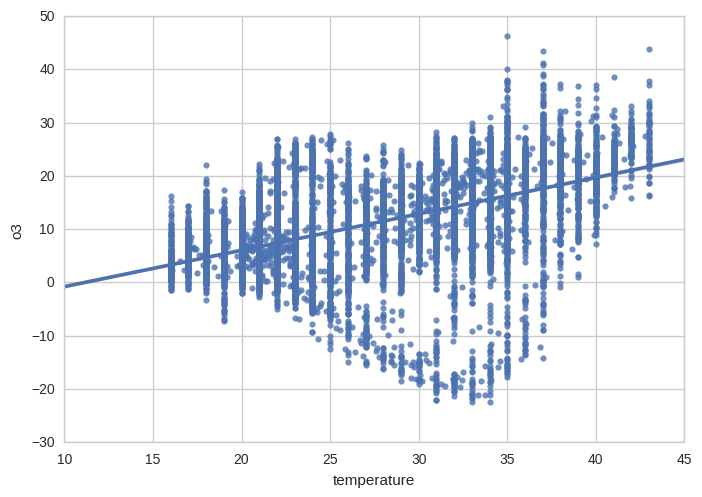

In [8]:
plt.figure(); sns.regplot(data=train, x='temperature', y='co')
plt.figure(); sns.regplot(data=train, x='temperature', y='no2')
plt.figure(); sns.regplot(data=train, x='temperature', y='o3')
plt.show()

In [19]:
def plot(cf):
    data = train.copy()
    cf.fit(data[INVERSE_X], data[INVERSE_Y])
    print(cf.score(data[INVERSE_X], data[INVERSE_Y]))
    preds = cf.predict(data[INVERSE_X])
    data['co-pred'] = preds[:, 0]
    data['co-resid'] = data['co'] - data['co-pred']
    data['no2-pred'] = preds[:, 1]
    data['no2-resid'] = data['no2'] - data['no2-pred']
    data['o3-pred'] = preds[:, 2]
    data['o3-resid'] = data['o3'] - data['o3-pred']
    data.plot(y=['co', 'co-pred'])
    data.plot(y=['no2', 'no2-pred'])
    data.plot(y=['o3', 'o3-pred'])
    plt.legend(loc='best')
    sns.jointplot(data=data, x='temperature', y='co-resid')
    sns.jointplot(data=data, x='temperature', y='no2-resid')
    sns.jointplot(data=data, x='temperature', y='o3-resid')
    sns.jointplot(data=data, x='humidity', y='co-resid')
    sns.jointplot(data=data, x='humidity', y='no2-resid')
    sns.jointplot(data=data, x='humidity', y='o3-resid')
    plt.legend(loc='best')
    plt.show()
    return cf

# Linear

0.684697598649


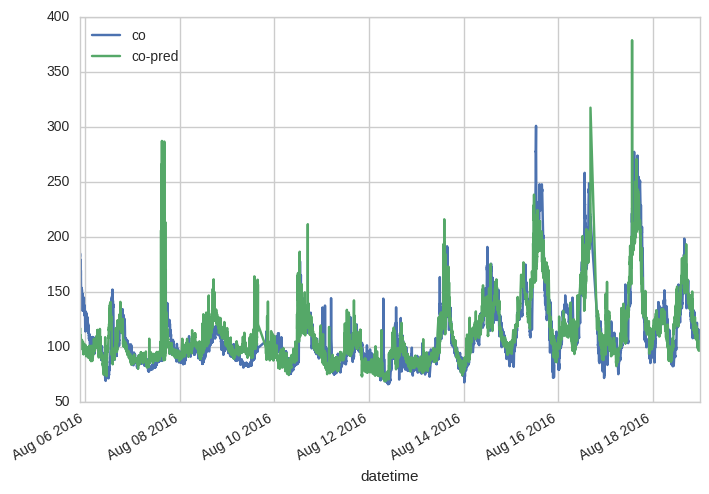

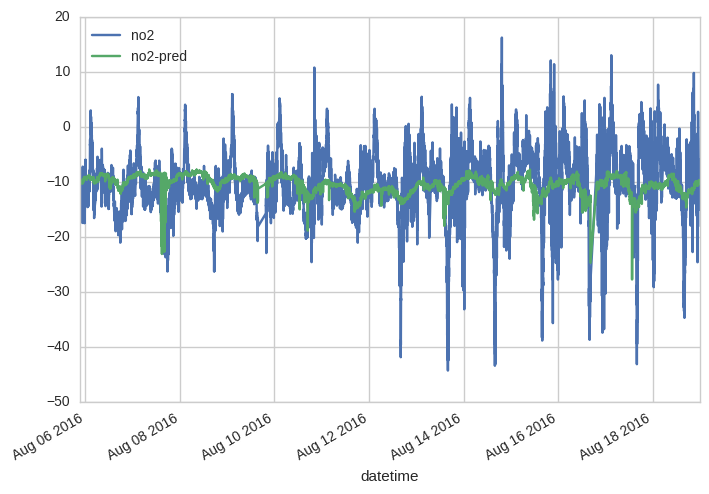

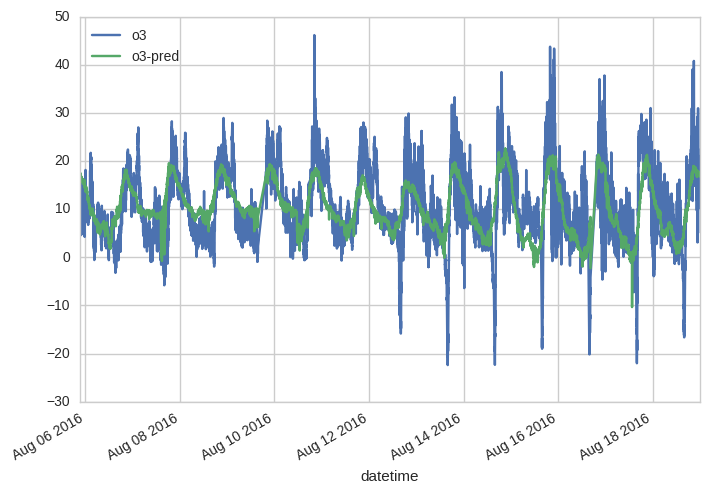

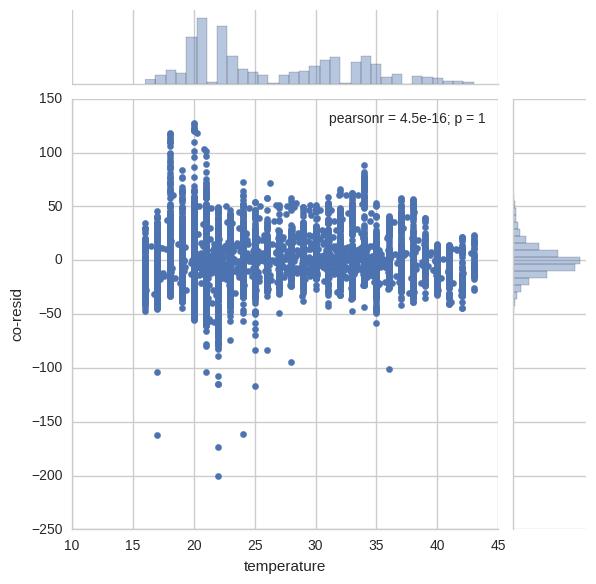

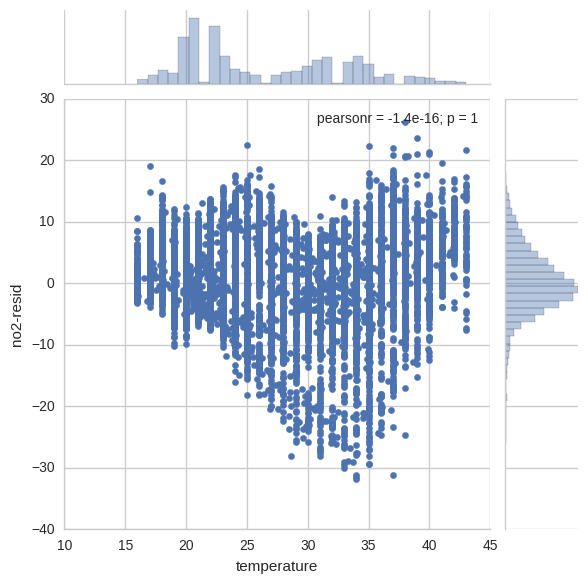

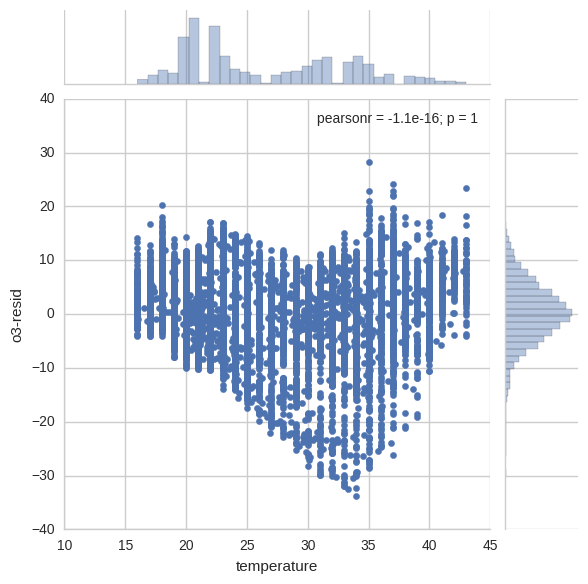

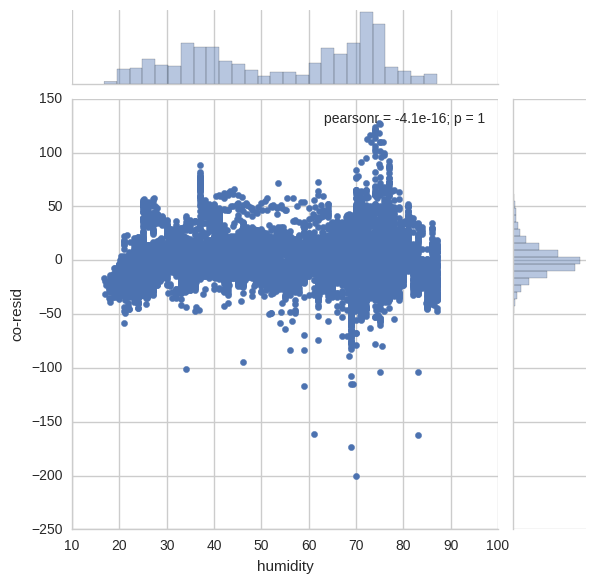

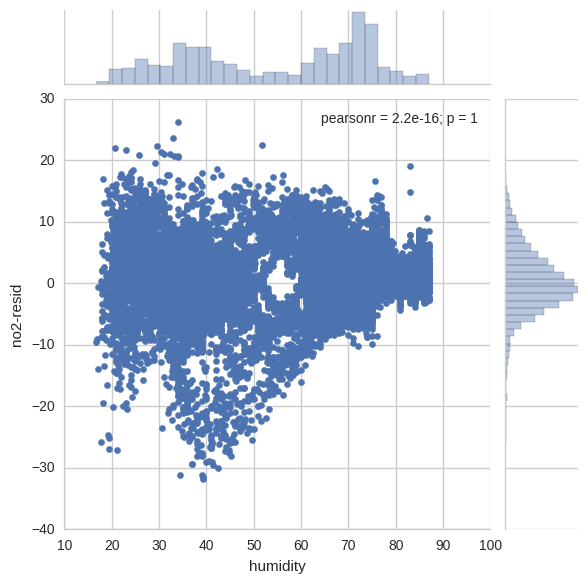

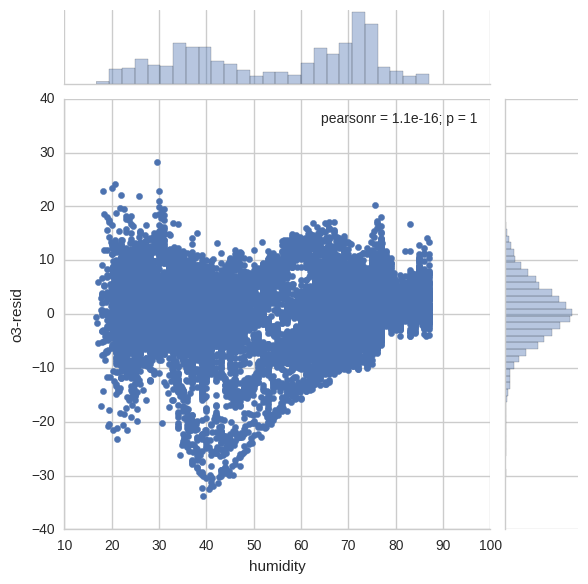

[[ 123.79444999    1.42442458    0.04093144    2.51430197   -0.63754899
     0.63356199]
 [  -9.21649511    0.02772494   -0.03074986    0.19653562   -0.58763341
     0.08142854]
 [  -6.60038308    0.02165404    0.19256545    0.4045789    -0.36371397
     0.0751067 ]]
[ 586.48059426  570.50953166  354.53181087]


In [20]:
cf = LinearRegression()
cf = plot(cf)
print(cf.coef_)
print(cf.intercept_)

# Quadratic

0.744542683512


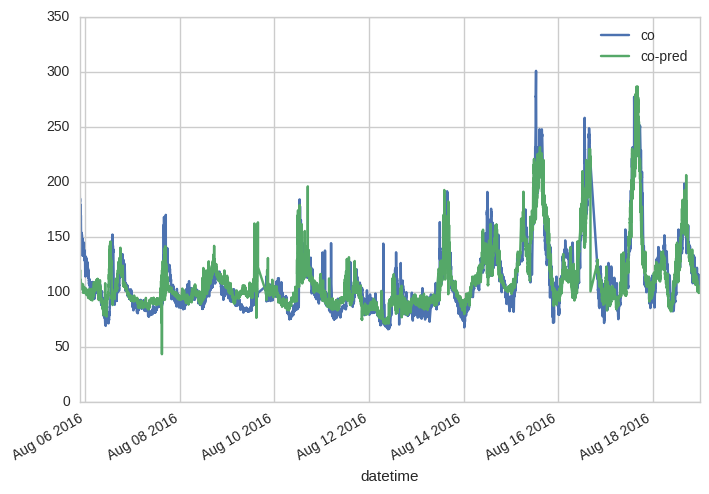

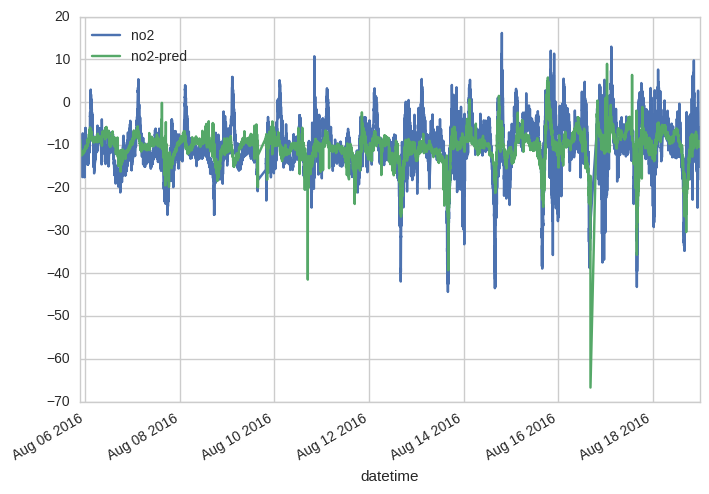

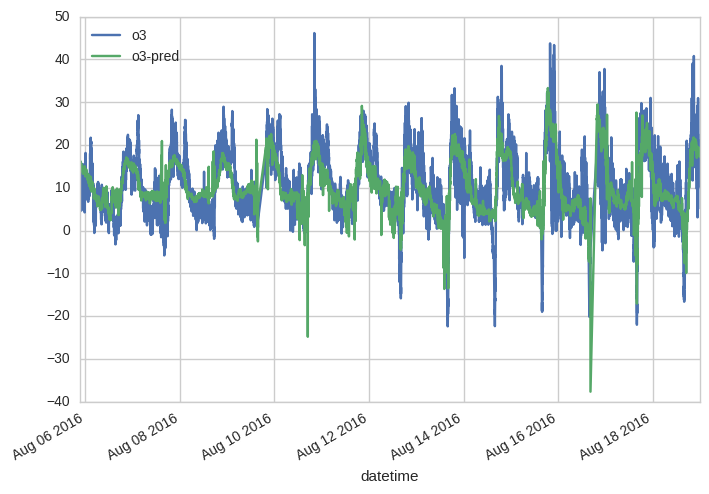

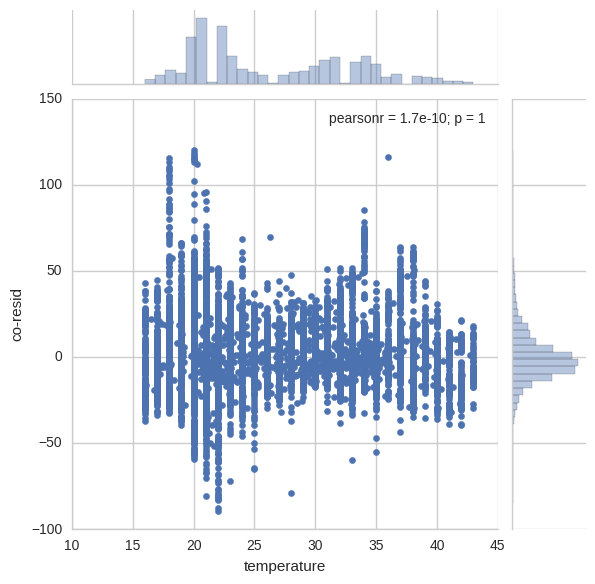

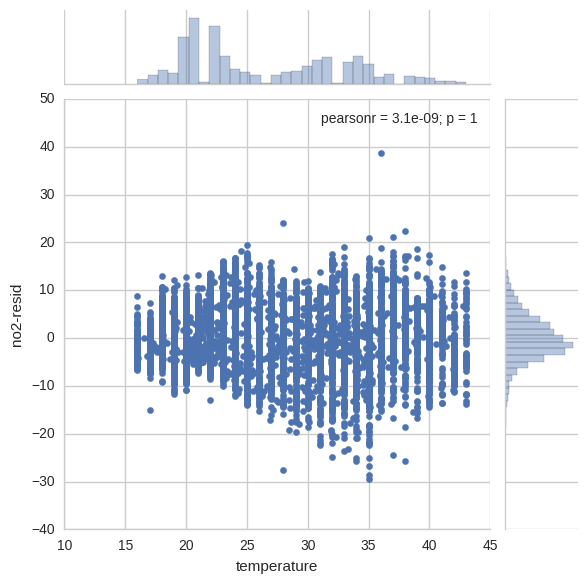

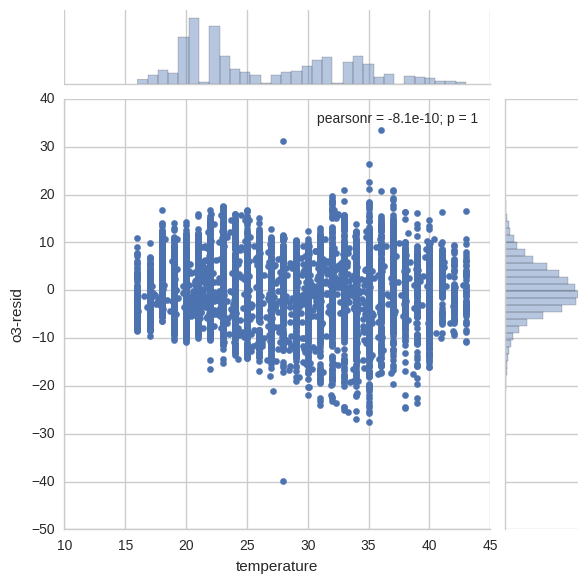

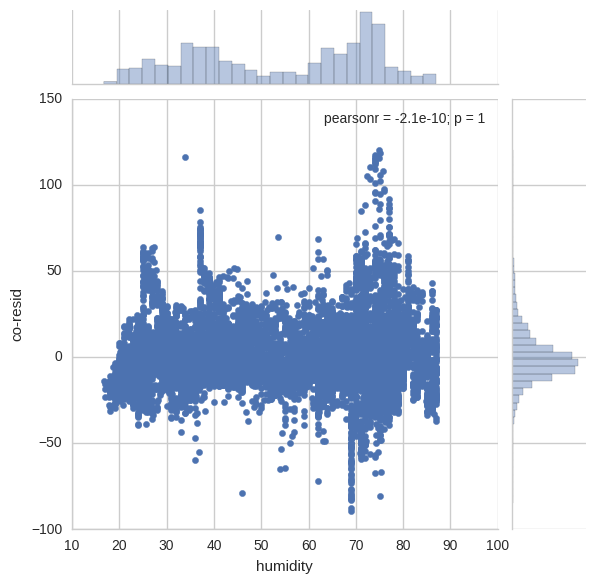

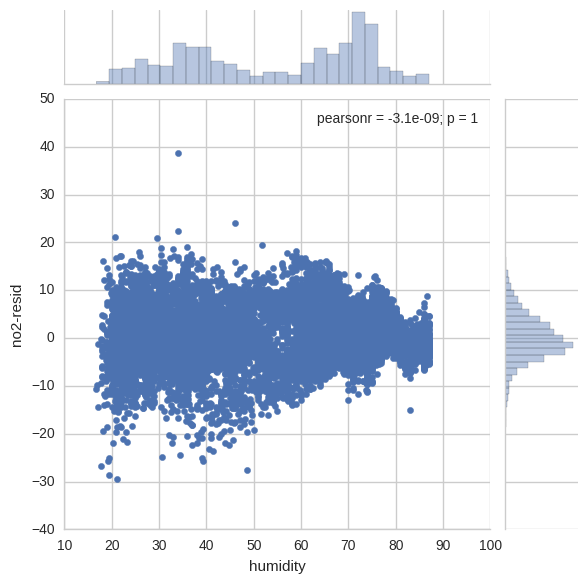

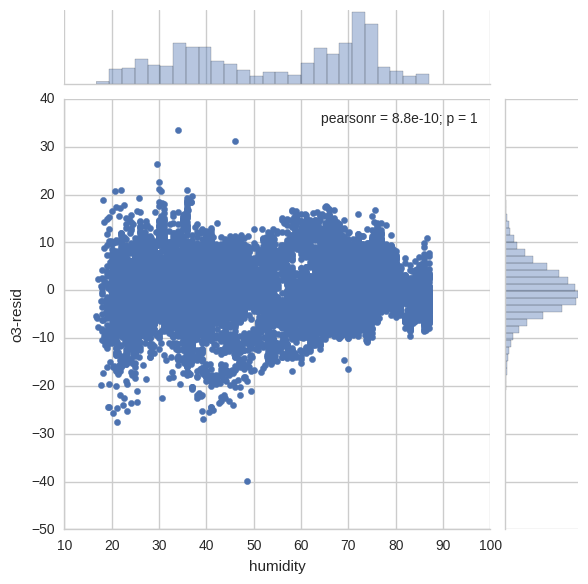

[[   -0.00000002 -4012.51967144   -73.17673238   -60.72275868
    246.54902654   719.47048635    -6.16637522   -68.71262905
      4.87670033    -1.14891591   -11.7428904      4.66710113
     -4.16247896    -0.05693884    -0.03599479     0.21669764
      0.06789742     0.03821422    -0.00879175    -0.02158355
      0.06401729    -0.02281771     0.12587226    -0.25341283
      0.06327877    -0.35904684     0.00762863    -0.01100831]
 [    0.00000003  4213.26319415   -20.05719296   -79.89063274
    -49.04243606   -48.76829072   -76.01189866     5.61736658
     -0.41515095    -0.09784846     3.32753496    -4.41165154
      1.68259942     0.00708153    -0.00886285     0.07687427
      0.01781283     0.0107695     -0.00939377     0.06982433
      0.07876739     0.00245508     0.14168993     0.03085008
      0.10529057     0.02071554     0.07130318     0.01057151]
 [    0.00000005  6571.42068818   -39.20600564   -66.15198083
     46.76394339   -41.96884269   -35.37359241     3.59345217    -0.

In [21]:
cf = make_pipeline(PolynomialFeatures(2), LinearRegression())
cf = plot(cf)
print(cf.steps[1][1].coef_)
print(cf.steps[1][1].intercept_)

0.723829792188


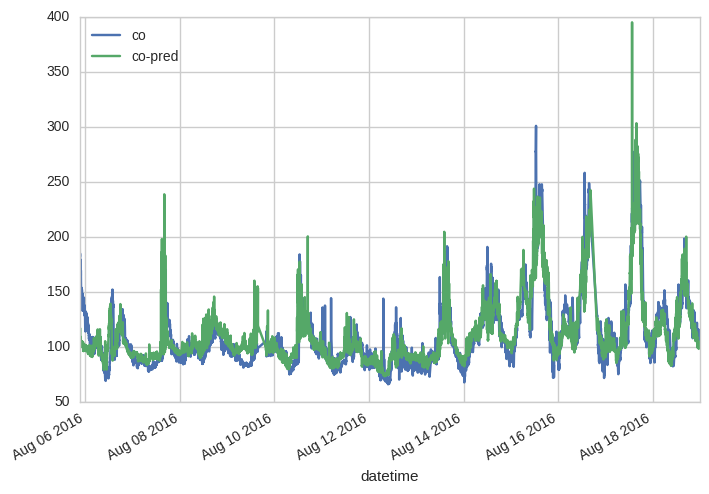

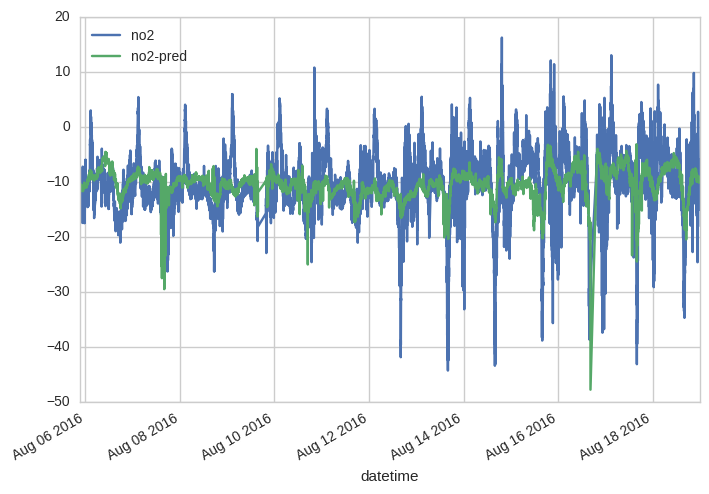

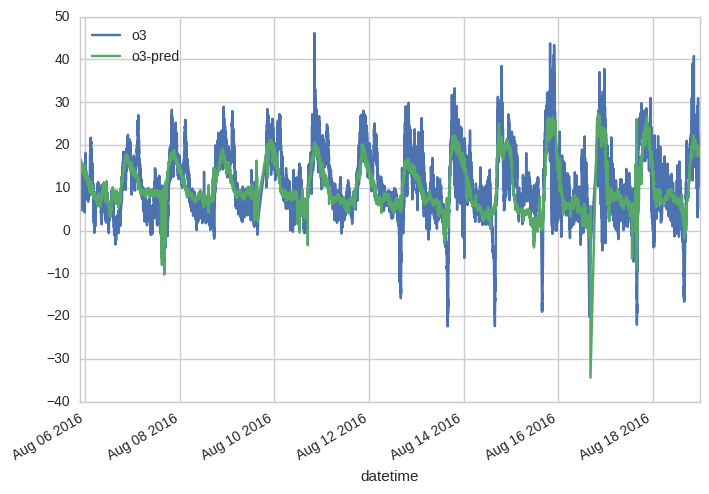

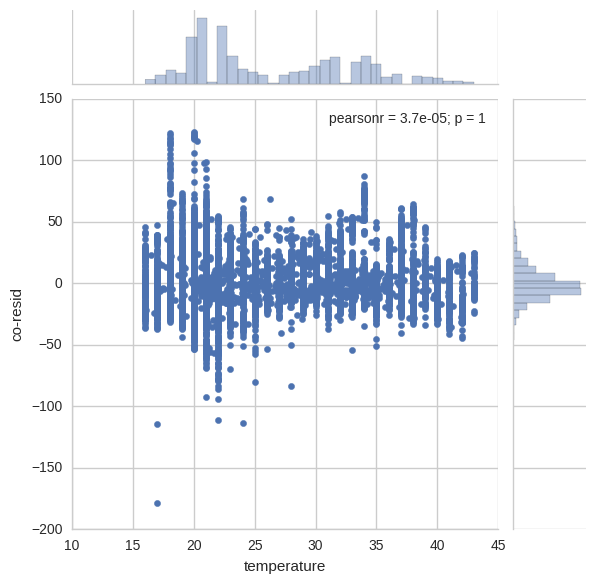

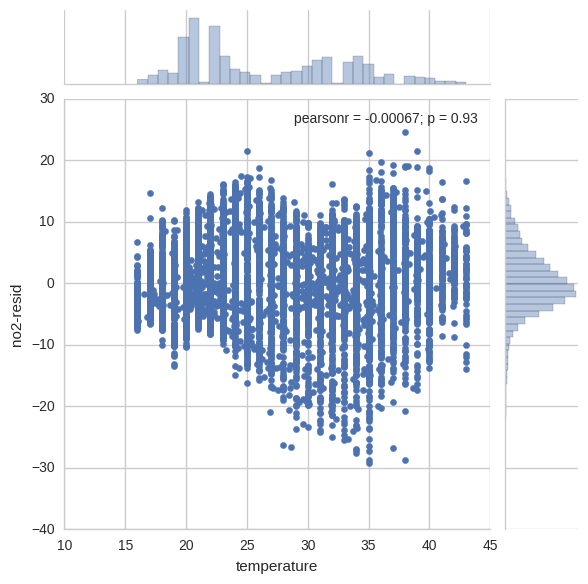

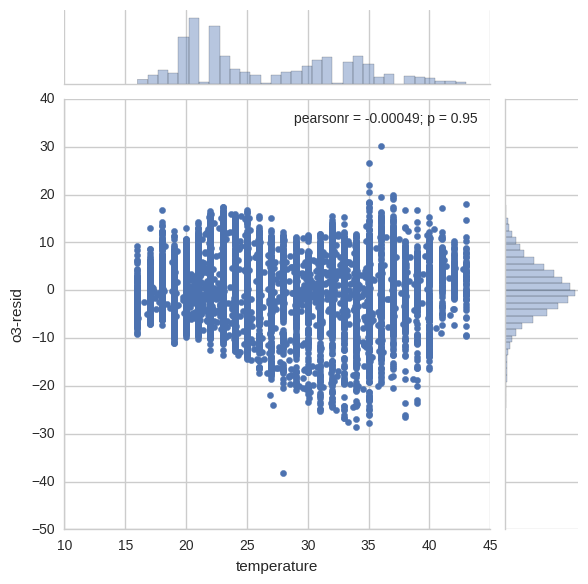

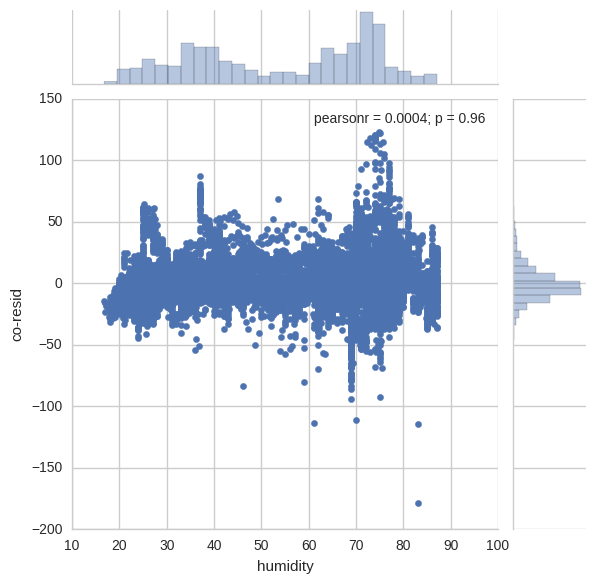

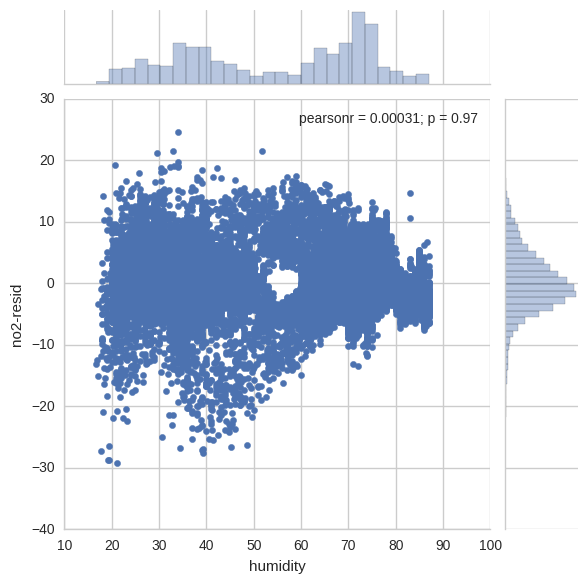

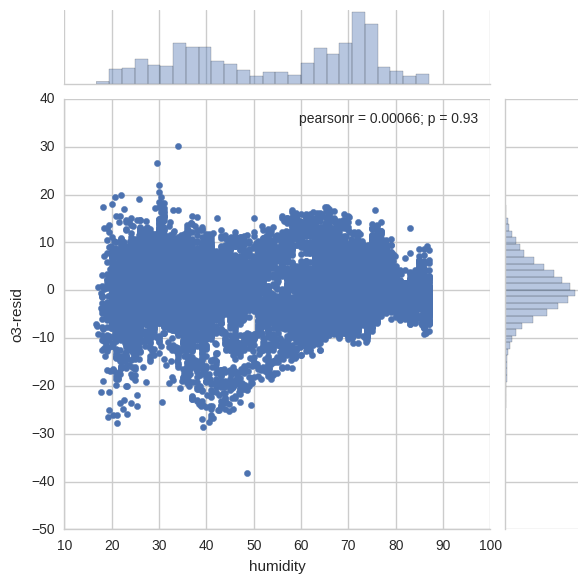

[[ 0.          0.         -0.          0.          0.          0.          0.
  -0.          3.82584971 -0.          0.          0.03231053 -0.
  -0.03991808 -0.03136873  0.12649386 -0.00205146  0.02129222 -0.00572478
   0.03541411 -0.0001024   0.00001057  0.02681153 -0.00342006  0.02175545
  -0.00048114  0.0005747  -0.00880501]
 [ 0.         -0.          0.          0.         -0.          0.          0.
   0.         -0.         -0.         -0.         -0.0249728   0.19534735
   0.00844522  0.00566913  0.01755218 -0.0012178   0.00593903 -0.00149659
   0.02912646 -0.0009427   0.002166    0.01716687 -0.00240701 -0.00634618
  -0.00024056  0.00023397 -0.00424574]
 [ 0.         -0.         -0.          0.         -0.         -0.          0.
   0.         -0.         -0.         -0.         -0.0283446   0.25576566
   0.01281927  0.00230745  0.04231117 -0.0023178   0.01290792 -0.00269473
   0.02265718 -0.00016706 -0.00242163  0.0095243  -0.00188241 -0.00857355
  -0.00014054  0.00027194 -0.0

In [23]:
cf = make_pipeline(PolynomialFeatures(2), Lasso())
cf = plot(cf)
print(cf.steps[1][1].coef_)
print(cf.steps[1][1].intercept_)

0.741324455057


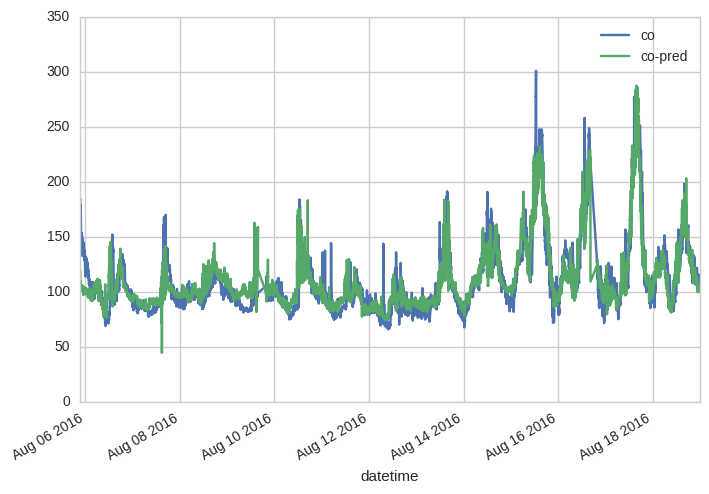

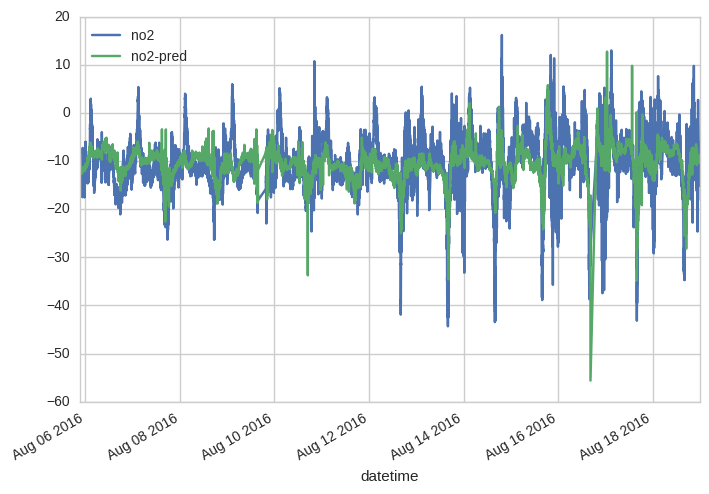

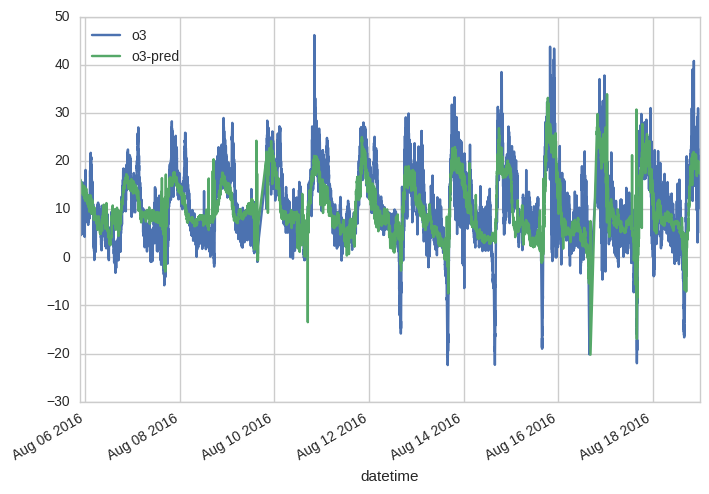

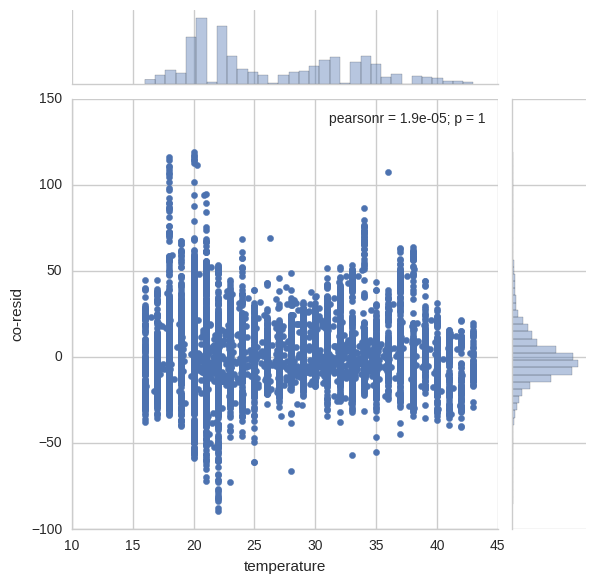

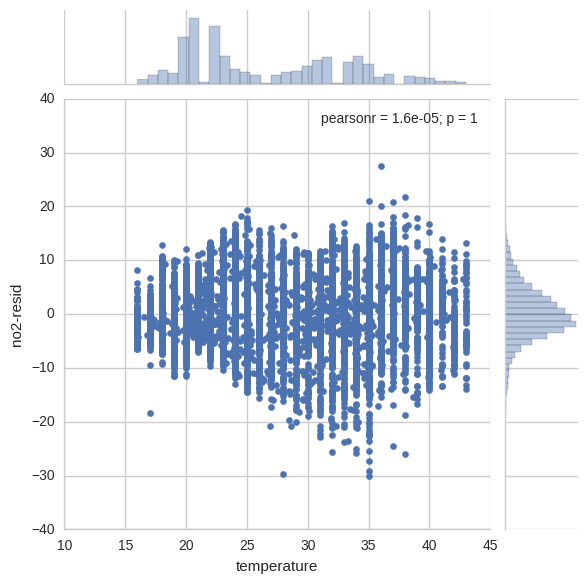

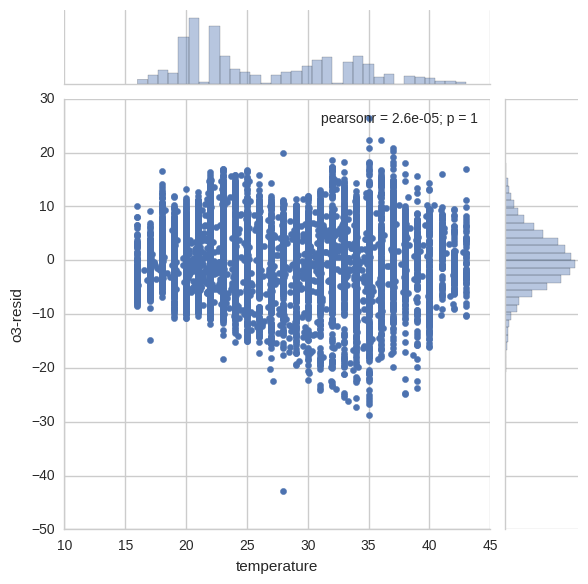

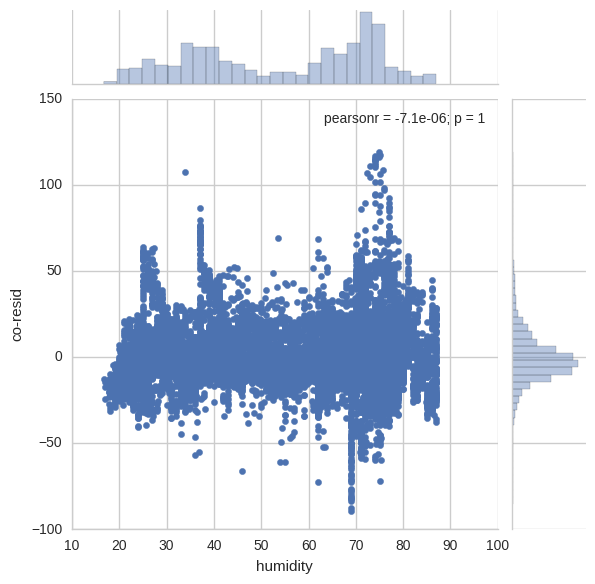

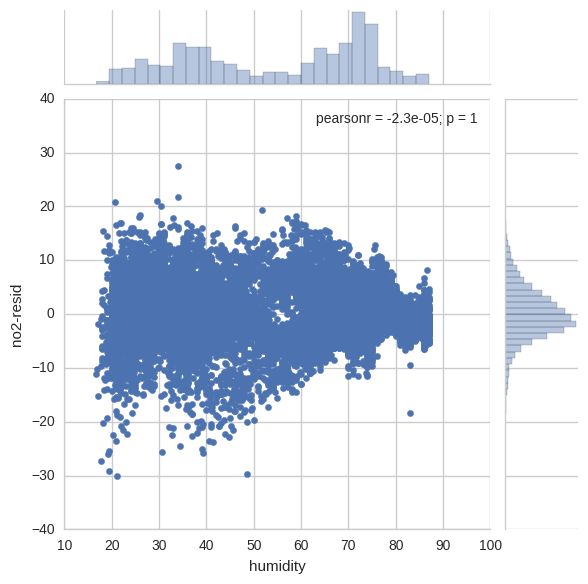

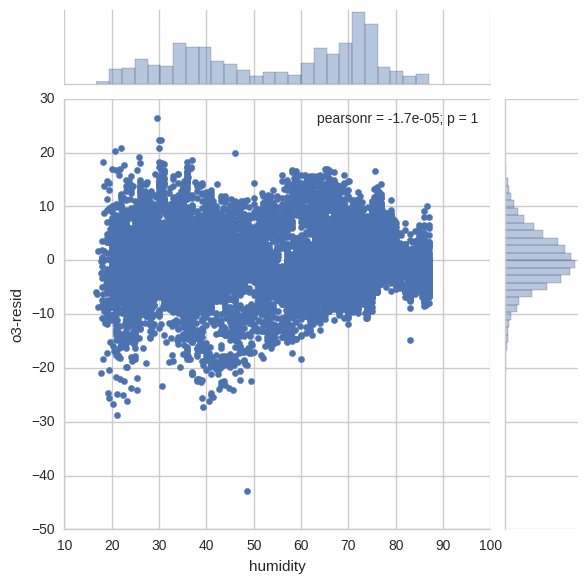

[[  0.          -1.84169921 -45.91753237 -15.57878433  33.11234398
   50.65331491 -36.28672223 -67.21304357   5.07621053  -1.25928731
   -9.52008205   0.55360244  -3.51976306  -0.05670569  -0.02772331
    0.20122399   0.04074672   0.04000214  -0.00646656  -0.02175216
    0.01846509  -0.02025381   0.0946373   -0.0367986    0.03082037
   -0.02701752   0.03900274  -0.01686121]
 [  0.           1.14536076  25.86716209 -55.18724425   8.9340072
   -8.44168927 -36.14492532   7.70410759  -0.59260492  -0.15619099
    2.21910938  -0.1403489    1.25872528   0.0104192   -0.0073856
    0.08587698  -0.02872984   0.01460691  -0.00919052   0.07666128
    0.05368086   0.00525265   0.17615913  -0.03093902   0.13913135
    0.00272672   0.02959033   0.0185051 ]
 [  0.           1.60637565  19.93261526 -48.26890828  15.3886082
  -10.20801282 -29.41224002   6.88319033  -0.94014367  -0.37378295
    2.16119558  -0.11954417   1.14466128   0.02111165  -0.00397967
    0.07957472  -0.02317626   0.01749337  -0.007

In [24]:
cf = make_pipeline(PolynomialFeatures(2), Ridge())
cf = plot(cf)
print(cf.steps[1][1].coef_)
print(cf.steps[1][1].intercept_)